# GR5243 Project 1: Prodiction of Songs Popularity
## Group Members:
 - Jingyi Du (jd3882)
 - Jingyi Zhang (jz3543)
 - Jingyu Gu (jg4536)
 - Yuchen Wang (yw3890)

## 0. Environment Setting

In [ ]:
# import some basic libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Encoding
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder

# Data Processing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_validate

# Sampling
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE

from sklearn.pipeline import make_pipeline
from imblearn.pipeline import make_pipeline as imb_make_pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV as RSCV


# Machine Learning Models
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.svm import SVR
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import mean_squared_error
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import BaggingClassifier
0000000000000000000000000
from sklearn.impute import SimpleImputer
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import classification_report
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier, export_text
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

#stat
import statsmodels.api as sm
from statsmodels.formula.api import ols


# Evaluations
from sklearn.metrics import mean_squared_error as MSE

In [ ]:

import re
import nltk
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('stopwords')
nltk.download('punkt')

from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize

from wordcloud import WordCloud

from sklearn.feature_extraction.text import TfidfVectorizer

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


## 1. Data Loading and Cleaning

### 1.1. Dataset Information

In [ ]:
# Import database
df = pd.read_csv('data.csv')

In [ ]:
df.shape
print(f"There are {df.shape[0]} rows and {df.shape[1]} columns")

There are 169909 rows and 19 columns


In [ ]:
df.head()

acousticness                                   artists  danceability  \
0         0.995                       ['Carl Woitschach']         0.708   
1         0.994  ['Robert Schumann', 'Vladimir Horowitz']         0.379   
2         0.604                   ['Seweryn Goszczyński']         0.749   
3         0.995                      ['Francisco Canaro']         0.781   
4         0.990  ['Frédéric Chopin', 'Vladimir Horowitz']         0.210   

   duration_ms  energy  explicit                      id  instrumentalness  \
0       158648  0.1950         0  6KbQ3uYMLKb5jDxLF7wYDD             0.563   
1       282133  0.0135         0  6KuQTIu1KoTTkLXKrwlLPV             0.901   
2       104300  0.2200         0  6L63VW0PibdM1HDSBoqnoM             0.000   
3       180760  0.1300         0  6M94FkXd15sOAOQYRnWPN8             0.887   
4       687733  0.2040         0  6N6tiFZ9vLTSOIxkj8qKrd             0.908   

   key  liveness  loudness  mode  \
0   10    0.1510   -12.428     1   
1    8    0.0763   -28.454     1   
2    5    0.1190   -19.924     0   
3    1    0.1110   -14.734     0   
4   11    0.0980   -16.829     1   

                                            name  popularity release_date  \
0                    Singende Bataillone 1. Teil           0         1928   
1       Fantasiestücke, Op. 111: Più tosto lento           0         1928   
2                 Chapter 1.18 - Zamek kaniowski           0         1928   
3  Bebamos Juntos - Instrumental (Remasterizado)           0   1928-09-25   
4    Polonaise-Fantaisie in A-Flat Major, Op. 61           1         1928   

   speechiness    tempo  valence  year  
0       0.0506  118.469   0.7790  1928  
1       0.0462   83.972   0.0767  1928  
2       0.9290  107.177   0.8800  1928  
3       0.0926  108.003   0.7200  1928  
4       0.0424   62.149   0.0693  1928

# NLP preprocessing

In [ ]:
df['artists']=df['artists'].apply(
    lambda x: x.replace("[", "").replace("]", "").replace("'", "").replace(",", "").lower()
    )

In [ ]:
df['artists']

0                           carl woitschach
1         robert schumann vladimir horowitz
2                       seweryn goszczyński
3                          francisco canaro
4         frédéric chopin vladimir horowitz
                        ...                
169904                      dripreport tyga
169905          leon bridges terrace martin
169906                       kygo oh wonder
169907               cash cash andy grammer
169908                       ingrid andress
Name: artists, Length: 169909, dtype: object

In [ ]:
def lm_pre(name):
  a=re.sub('[^a-zA-Z]', ' ', name).lower()
  a1=a.split()
  lm = WordNetLemmatizer()

  a2=[lm.lemmatize(word) for word in a1 if not word in stopwords.words('english')]
  a2=[word for word in a2 if word not in ['remaster','remastered','remasterizado',
                                          'feat','remix','mix','version']]
  a3 = ' '.join(a2)
  return a3

In [ ]:
df['name']=df['name'].apply(lm_pre)
df.head()

acousticness                                   artists  danceability  \
0         0.995                       ['Carl Woitschach']         0.708   
1         0.994  ['Robert Schumann', 'Vladimir Horowitz']         0.379   
2         0.604                   ['Seweryn Goszczyński']         0.749   
3         0.995                      ['Francisco Canaro']         0.781   
4         0.990  ['Frédéric Chopin', 'Vladimir Horowitz']         0.210   

   duration_ms  energy  explicit                      id  instrumentalness  \
0       158648  0.1950         0  6KbQ3uYMLKb5jDxLF7wYDD             0.563   
1       282133  0.0135         0  6KuQTIu1KoTTkLXKrwlLPV             0.901   
2       104300  0.2200         0  6L63VW0PibdM1HDSBoqnoM             0.000   
3       180760  0.1300         0  6M94FkXd15sOAOQYRnWPN8             0.887   
4       687733  0.2040         0  6N6tiFZ9vLTSOIxkj8qKrd             0.908   

   key  liveness  loudness  mode                               name  \
0   10    0.1510   -12.428     1           singende bataillone teil   
1    8    0.0763   -28.454     1   fantasiest cke op pi tosto lento   
2    5    0.1190   -19.924     0            chapter zamek kaniowski   
3    1    0.1110   -14.734     0         bebamos junto instrumental   
4   11    0.0980   -16.829     1  polonaise fantaisie flat major op   

   popularity release_date  speechiness    tempo  valence  year  
0           0         1928       0.0506  118.469   0.7790  1928  
1           0         1928       0.0462   83.972   0.0767  1928  
2           0         1928       0.9290  107.177   0.8800  1928  
3           0   1928-09-25       0.0926  108.003   0.7200  1928  
4           1         1928       0.0424   62.149   0.0693  1928

In [ ]:
›vectorizer = TfidfVectorizer(min_df=15
                       )
artist_tfidf = vectorizer.fit_transform(df['artists'])
artist_tfidf=pd.DataFrame(artist_tfidf.toarray())
artist_tfidf.columns = artist_tfidf.columns.astype(str)
artist_tfidf

0    1    2    3    4    5    6    7    8    9  ...  4731  4732  \
0       0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   0.0   0.0   
1       0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   0.0   0.0   
2       0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   0.0   0.0   
3       0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   0.0   0.0   
4       0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   0.0   0.0   
...     ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   ...   ...   
169904  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   0.0   0.0   
169905  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   0.0   0.0   
169906  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   0.0   0.0   
169907  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   0.0   0.0   
169908  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   0.0   0.0   

        4733  4734  4735  4736  4737  4738  4739  4740  
0        0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
1        0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
2        0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
3        0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
4        0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
...      ...   ...   ...   ...   ...   ...   ...   ...  
169904   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
169905   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
169906   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
169907   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
169908   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  

[169909 rows x 4741 columns]

# PCA


In [ ]:
df_pca = pd.concat([df.drop(['artists','name','release_date','id'], axis=1), artist_tfidf], axis=1)


In [ ]:
df_pca.head(2)

acousticness  danceability  duration_ms  energy  explicit  \
0         0.995         0.708       158648  0.1950         0   
1         0.994         0.379       282133  0.0135         0   

   instrumentalness  key  liveness  loudness  mode  ...  4731  4732  4733  \
0             0.563   10    0.1510   -12.428     1  ...   0.0   0.0   0.0   
1             0.901    8    0.0763   -28.454     1  ...   0.0   0.0   0.0   

   4734  4735  4736  4737  4738  4739  4740  
0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
1   0.0   0.0   0.0   0.0   0.0   0.0   0.0  

[2 rows x 4756 columns]

In [ ]:
from sklearn.decomposition import PCA
sampled_df = df_pca.sample(n=1000).reset_index(drop=True)
pca = PCA(n_components=50)
X_pca = pca.fit_transform(sampled_df)

X_pca = pd.DataFrame(X_pca)


In [ ]:
# from sklearn.decomposition import TruncatedSVD
# svd = TruncatedSVD(n_components=30, random_state=42)
# X_svd = svd.fit_transform(df_pca)

In [ ]:
sampled_df.head()

# Content based filtering

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity
df0=X_pca

df1=pd.DataFrame(StandardScaler().fit_transform(df0))
cosine_sim = cosine_similarity(df1, df1)

# Define the function for recommendation
def recommend_songs(song_index, cosine_sim=cosine_sim, df=sampled_df, num_recommendations=10):
    sim_scores = list(enumerate(cosine_sim[song_index]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    song_indices = [i[0] for i in sim_scores]
    return sampled_df.iloc[song_indices[:num_recommendations], :]

# Test the recommendation function
recommend_songs(1)

NameError: ignored

# Clustering with artists' tfidf vectors



In [ ]:
# from sklearn.cluster import KMeans

# # find the best number of clusters
# inertia = []
# for i in range(1, 11):
#     km = KMeans(n_clusters=i, random_state=0)
#     km.fit(sampled_df)
#     inertia.append(km.inertia_)

# plt.plot(range(1, 11), inertia, marker='o')

# Word Cloud

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


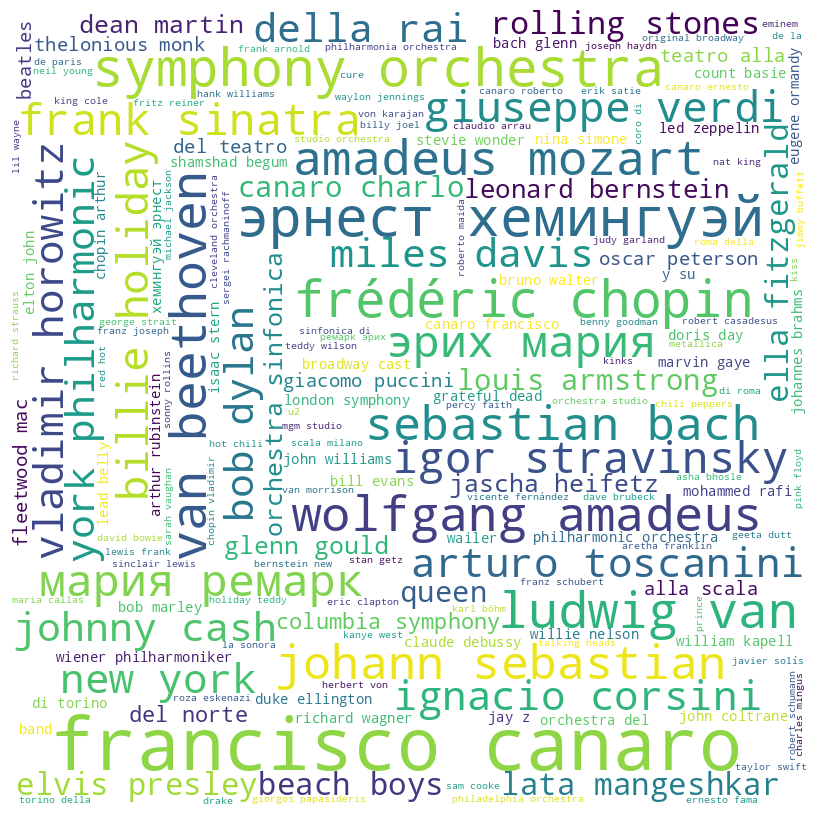

In [ ]:
# list of artists names
song_names = df['artists'].to_list()

# Concatenate the song names into a single string
song_text = ' '.join(song_names)

# Tokenize the text into words
words = word_tokenize(song_text)

# Generate the word cloud
wordcloud = WordCloud(width=800, height=800, background_color='white', min_font_size=10).generate(' '.join(words))
# Plot the word cloud
plt.figure(figsize=(8,8), facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()
wordcloud.to_file("artist_wdcloud.png")


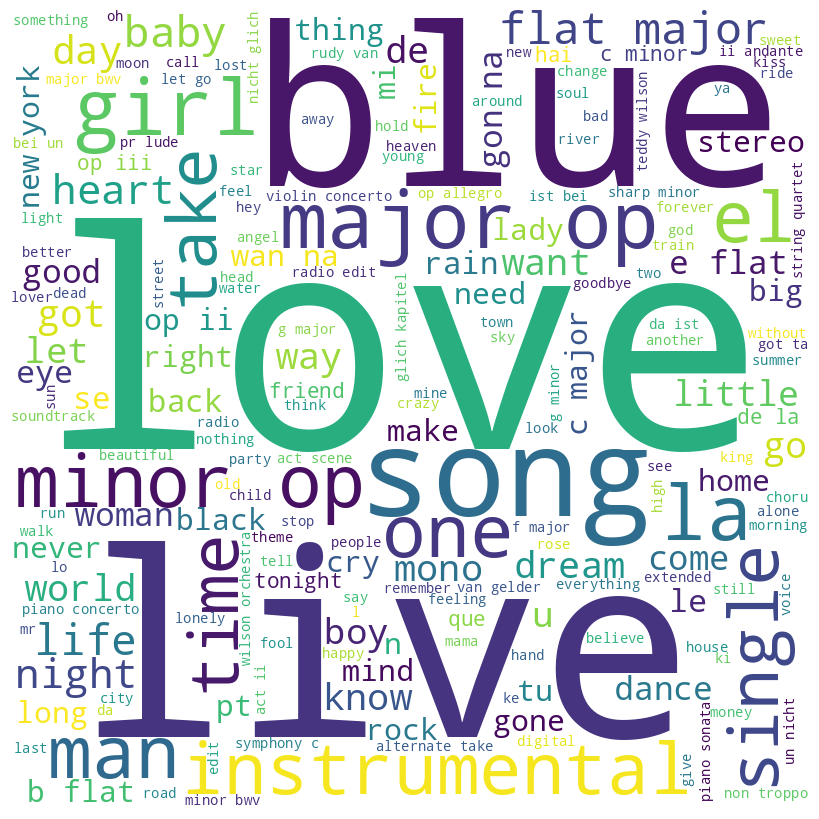

In [ ]:
song_names = df['name'].to_list()

# Concatenate the song names into a single string
song_text = ' '.join(song_names)

# Tokenize the text into words
words = word_tokenize(song_text)

# Generate the word cloud
wordcloud = WordCloud(width=800, height=800, background_color='white', min_font_size=10).generate(' '.join(words))
plt.figure(figsize=(8,8), facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()
wordcloud.to_file("name_wdcloud.png")

In [ ]:
a1

['Bebamos', 'Juntos', 'Instrumental', 'Remasterizado']

In [ ]:
# Drop useless columns
df = df.drop(['artists','name','release_date','id'], axis=1)

### 1.2. Missing Values

In [ ]:
# Detection
# Columns that contain NA values
df.columns[df.isnull().any()]
df = df.dropna()

# Column names and the total number of NA values that each column contains
df[df.columns[df.isnull().any()]].isna().sum()

# Calculate Missing rate and dropping columns
missing_rate = np.sum(df.isna(), axis = 0).values/df.shape[0]
print(missing_rate)

# There is no NA Values in each column

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [ ]:
df.head()

acousticness                            artists  danceability  duration_ms  \
0         0.995                    carl woitschach         0.708       158648   
1         0.994  robert schumann vladimir horowitz         0.379       282133   
2         0.604                seweryn goszczyński         0.749       104300   
3         0.995                   francisco canaro         0.781       180760   
4         0.990  frédéric chopin vladimir horowitz         0.210       687733   

   energy  explicit                      id  instrumentalness  key  liveness  \
0  0.1950         0  6KbQ3uYMLKb5jDxLF7wYDD             0.563   10    0.1510   
1  0.0135         0  6KuQTIu1KoTTkLXKrwlLPV             0.901    8    0.0763   
2  0.2200         0  6L63VW0PibdM1HDSBoqnoM             0.000    5    0.1190   
3  0.1300         0  6M94FkXd15sOAOQYRnWPN8             0.887    1    0.1110   
4  0.2040         0  6N6tiFZ9vLTSOIxkj8qKrd             0.908   11    0.0980   

   loudness  mode                                           name  popularity  \
0   -12.428     1                    Singende Bataillone 1. Teil           0   
1   -28.454     1       Fantasiestücke, Op. 111: Più tosto lento           0   
2   -19.924     0                 Chapter 1.18 - Zamek kaniowski           0   
3   -14.734     0  Bebamos Juntos - Instrumental (Remasterizado)           0   
4   -16.829     1    Polonaise-Fantaisie in A-Flat Major, Op. 61           1   

  release_date  speechiness    tempo  valence  year  
0         1928       0.0506  118.469   0.7790  1928  
1         1928       0.0462   83.972   0.0767  1928  
2         1928       0.9290  107.177   0.8800  1928  
3   1928-09-25       0.0926  108.003   0.7200  1928  
4         1928       0.0424   62.149   0.0693  1928

### 1.3 Features Division

In [ ]:
df.columns

Index(['acousticness', 'artists', 'danceability', 'duration_ms', 'energy',
       'explicit', 'id', 'instrumentalness', 'key', 'liveness', 'loudness',
       'mode', 'name', 'popularity', 'release_date', 'speechiness', 'tempo',
       'valence', 'year'],
      dtype='object')

In [ ]:
cate_feature = ['mode','explicit','key']
num_feature = ['acousticness', 'danceability', 'duration_ms', 'energy',
               'instrumentalness', 'liveness', 'loudness', 'popularity',
               'speechiness', 'tempo', 'valence', 'year']

## 2. Data Visualization

### 2.1 Dependent Variables: Popularity

#### 2.1.1 Distribution of Populaity

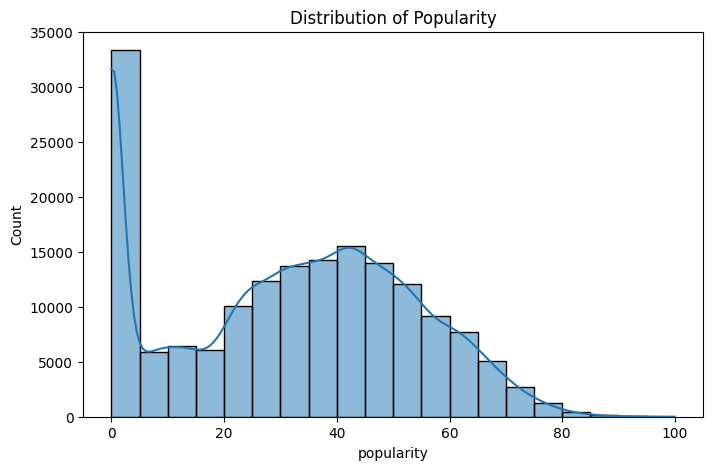

In [ ]:
fig, ax = plt.subplots(figsize=(8, 5))
ax = sns.histplot(df['popularity'], bins=20, kde=True)
plt.title("Distribution of Popularity");

#### 2.1.2 Correlation between Populaity and Independent Variables

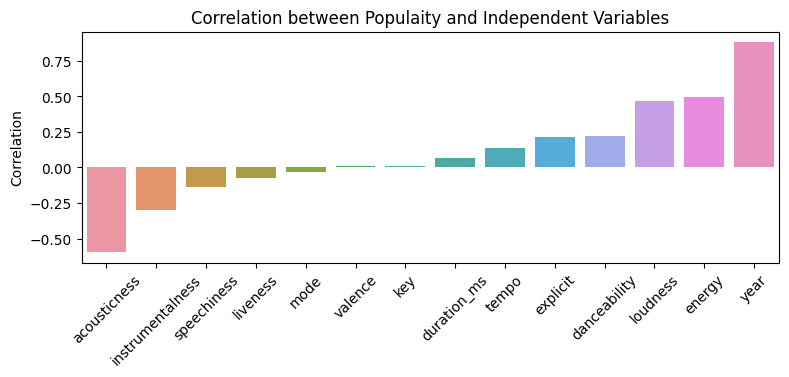

In [ ]:
# Show the correlations between popularity and features
# To get insights which feature will influence populaity and what will influence populaity least

df_corr = df.corr()['popularity'].sort_values()[:-1]

fig, ax = plt.subplots(figsize=(9, 3), dpi=100)
ax = sns.barplot(x=df_corr.index, y=df_corr.values)
plt.title("Correlation between Populaity and Independent Variables")
plt.ylabel("Correlation")
plt.xticks(rotation=45);

### 2.2 Independent Variables

### 2.2.1 Correlation between independent variables

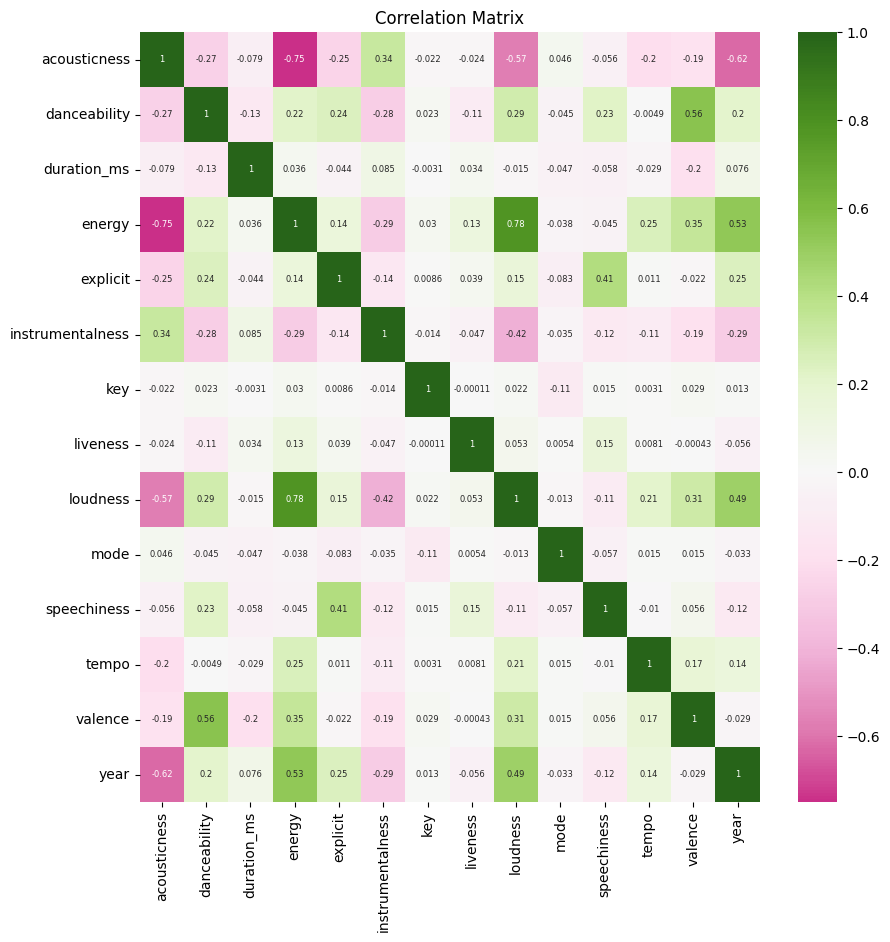

In [ ]:
# Correlation between independent variables
# To test the collinearity

X_columns = [i for i in df.columns if i not in ['popularity']]
corr_matrix = df[X_columns].corr()
fig = plt.figure(figsize = (10,10))
plt.title('Correlation Matrix')
sns.heatmap(corr_matrix, annot=True, annot_kws={"size":6}, center=0, cmap="PiYG")
plt.show()

### 2.2.2 Boxplots of Categorical Features

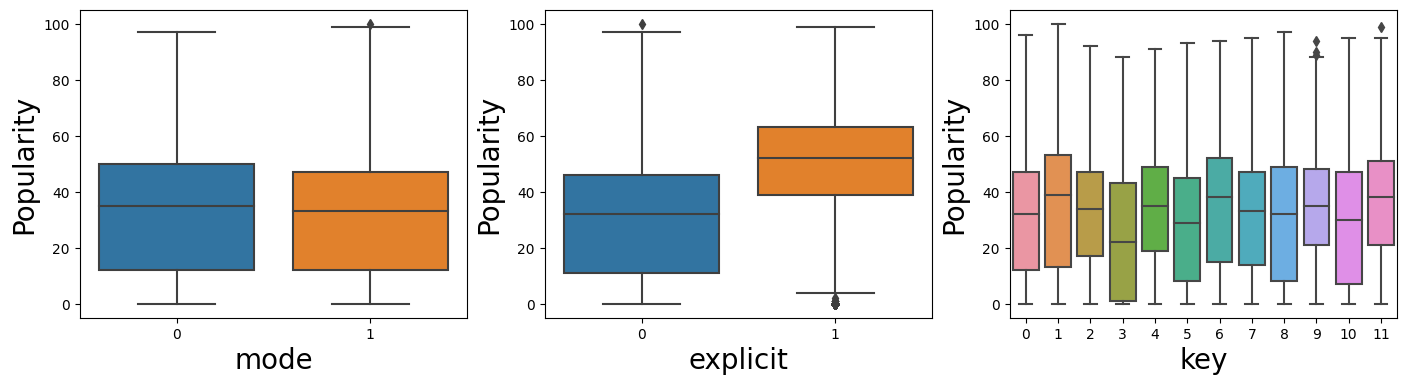

In [ ]:
# Categorical Features
# 可以consider一下要不要考虑dummy variables的影响
fig, ax=plt.subplots(nrows=1, ncols=3, figsize=(17,4))

for var, subplot in zip(cate_feature, ax.flatten()):
  b=sns.boxplot(x=var, y=df['popularity'], data=df, ax=subplot)
  b.set_xlabel(str(var), fontsize = 20)
  b.set_ylabel("Popularity", fontsize = 20)

#### 2.2.3 Histplots of Numerical Features

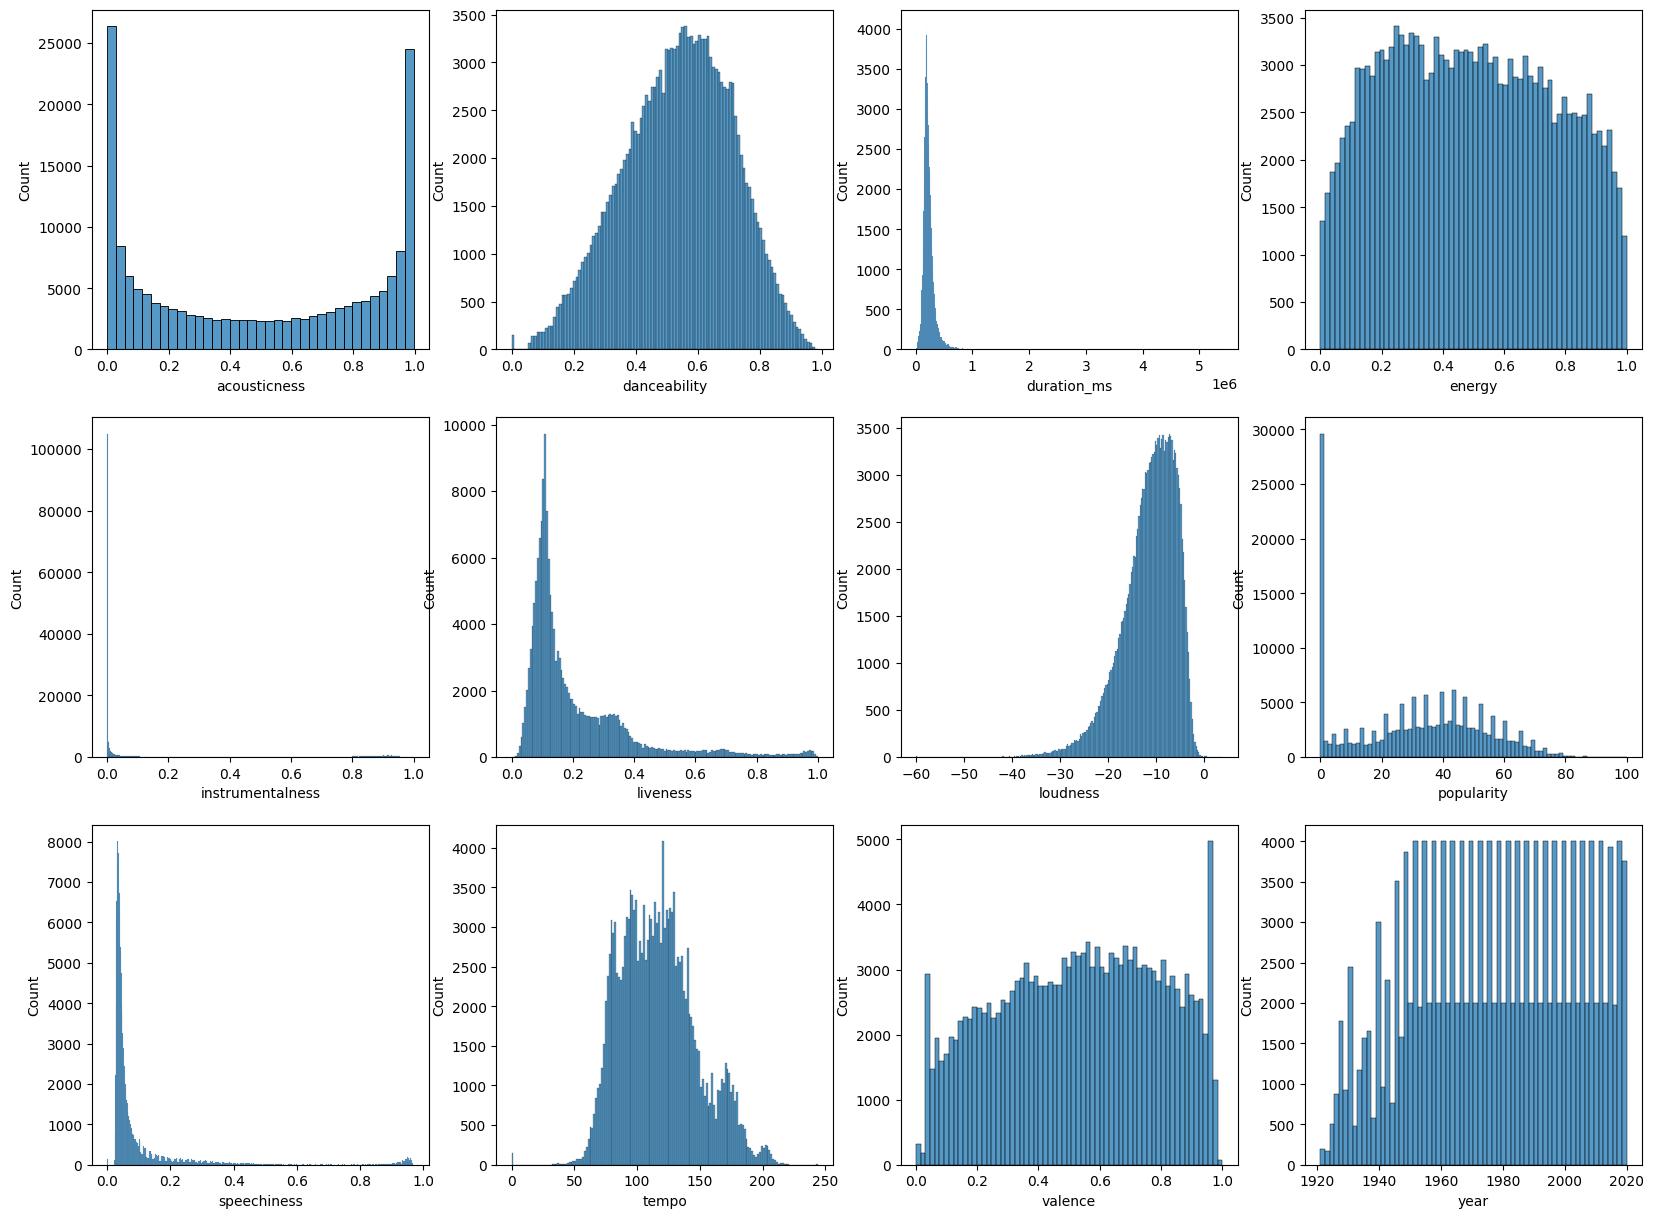

In [ ]:
# Numerical Features
fig, ax=plt.subplots(nrows=3, ncols=4, figsize=(20,15))
for feature, subplot in zip(num_feature, ax.flatten()):
    sns.histplot(x=df[feature],data=df, ax=subplot)

## 3. Data Processing

### 3.1 Categorical Features Encoding

In [ ]:
# Ordinal Encoding
ord_feature = ['key']

# One-Hot Encoding
ohe_feature = ['mode','explicit']

In [ ]:
ordinalencoder = OrdinalEncoder()
df_ord = ordinalencoder.fit_transform(df[ord_feature]).reshape(1,-1).tolist()[0]
df_ord = pd.DataFrame(df_ord)

ohe = OneHotEncoder()
df_ohe=ohe.fit_transform(df[ohe_feature])

ohe_array = df_ohe.toarray()
columns = ohe.get_feature_names_out()
df_ohe_all = pd.DataFrame(data = ohe_array, columns=['mode_0','mode_1','explicit_0','explicit_1'])

In [ ]:
df_ord

0
0       10.0
1        8.0
2        5.0
3        1.0
4       11.0
...      ...
169904   1.0
169905   8.0
169906   7.0
169907   1.0
169908   0.0

[169909 rows x 1 columns]

In [ ]:
df_ohe_all

mode_0  mode_1  explicit_0  explicit_1
0          0.0     1.0         1.0         0.0
1          0.0     1.0         1.0         0.0
2          1.0     0.0         1.0         0.0
3          1.0     0.0         1.0         0.0
4          0.0     1.0         1.0         0.0
...        ...     ...         ...         ...
169904     0.0     1.0         0.0         1.0
169905     0.0     1.0         1.0         0.0
169906     0.0     1.0         1.0         0.0
169907     0.0     1.0         1.0         0.0
169908     0.0     1.0         1.0         0.0

[169909 rows x 4 columns]

### 3.2 Train and Test Set Spliting

In [ ]:
# Concat to get the final dataset
df_final = pd.concat([df[num_feature], df_ohe_all,df_ord], axis=1)

In [ ]:
df_new=df_final.loc[df_final['year']>=1971]

In [ ]:
df_final

acousticness  danceability  duration_ms  energy  instrumentalness  \
0             0.9950         0.708       158648  0.1950          0.563000   
1             0.9940         0.379       282133  0.0135          0.901000   
2             0.6040         0.749       104300  0.2200          0.000000   
3             0.9950         0.781       180760  0.1300          0.887000   
4             0.9900         0.210       687733  0.2040          0.908000   
...              ...           ...          ...     ...               ...   
169904        0.1730         0.875       163800  0.4430          0.000032   
169905        0.0167         0.719       167468  0.3850          0.031300   
169906        0.5380         0.514       180700  0.5390          0.002330   
169907        0.0714         0.646       167308  0.7610          0.000000   
169908        0.1090         0.512       214787  0.4280          0.000000   

        liveness  loudness  popularity  speechiness    tempo  valence  year  \
0         0.1510   -12.428           0       0.0506  118.469   0.7790  1928   
1         0.0763   -28.454           0       0.0462   83.972   0.0767  1928   
2         0.1190   -19.924           0       0.9290  107.177   0.8800  1928   
3         0.1110   -14.734           0       0.0926  108.003   0.7200  1928   
4         0.0980   -16.829           1       0.0424   62.149   0.0693  1928   
...          ...       ...         ...          ...      ...      ...   ...   
169904    0.0891    -7.461          75       0.1430  100.012   0.3060  2020   
169905    0.1110   -10.907          64       0.0403  128.000   0.2700  2020   
169906    0.1080    -9.332          70       0.1050  123.700   0.1530  2020   
169907    0.2220    -2.557          70       0.0385  129.916   0.4720  2020   
169908    0.1050    -7.387          65       0.0271   80.588   0.3660  2020   

        mode_0  mode_1  explicit_0  explicit_1  
0          0.0     1.0         1.0         0.0  
1          0.0     1.0         1.0         0.0  
2          1.0     0.0         1.0         0.0  
3          1.0     0.0         1.0         0.0  
4          0.0     1.0         1.0         0.0  
...        ...     ...         ...         ...  
169904     0.0     1.0         0.0         1.0  
169905     0.0     1.0         1.0         0.0  
169906     0.0     1.0         1.0         0.0  
169907     0.0     1.0         1.0         0.0  
169908     0.0     1.0         1.0         0.0  

[169909 rows x 16 columns]

In [ ]:
y = df_final['popularity']
X = df_final.drop(['popularity'], axis=1)

In [ ]:
# X_scaled for "recommendation"
X_scaled=StandardScaler().fit_transform(df_final)

In [ ]:
# Split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)

scaler = StandardScaler()

# Fit and transform scalar on X_train
X_train.columns = X_train.columns.astype(str)
X_train = scaler.fit_transform(X_train)

# Transform X_val
X_test.columns = X_test.columns.astype(str)
X_test = scaler.transform(X_test)

## 4. Meachine Learning: Regression

In [ ]:
# Fit a linear regression model
lr = LinearRegression().fit(X_train, y_train)

# Make predictions on the test set
yhat_rf = lr.predict(X_test)


In [ ]:
lr.score(X_train, y_train)

0.7834364577073742

In [ ]:
lr.score(X_test, y_test)

0.785539407214804

In [ ]:
mean_squared_error(y_test, yhat_rf)

100.68917701065479

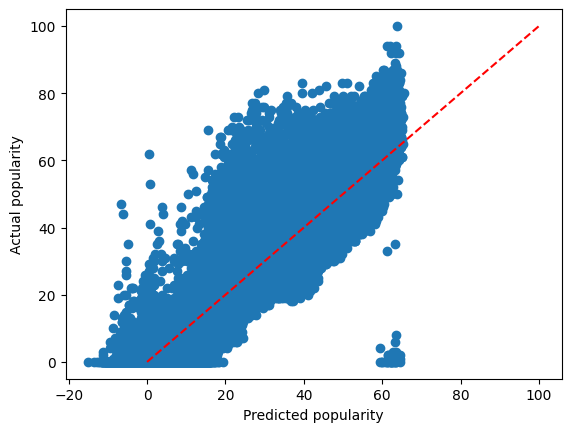

In [ ]:
# Plot the predicted vs actual values
plt.scatter(yhat_rf, y_test)
plt.xlabel('Predicted popularity')
plt.ylabel('Actual popularity')
plt.plot([0, 100], [0, 100], '--', color='red')
plt.show()

In [ ]:
# Perform feature selection
for i in range(1,16):
  selector = SelectKBest(f_regression, k=i)
  X_new = selector.fit_transform(X_train, y_train)

  # Print the selected features
  selected_features = X.columns[selector.get_support()]
  print(selected_features)

  #most important features are acousticness', 'danceability', 'energy', 'instrumentalness', 'loudness', 'year'

Index(['year'], dtype='object')
Index(['acousticness', 'year'], dtype='object')
Index(['acousticness', 'energy', 'year'], dtype='object')
Index(['acousticness', 'energy', 'loudness', 'year'], dtype='object')
Index(['acousticness', 'energy', 'instrumentalness', 'loudness', 'year'], dtype='object')
Index(['acousticness', 'danceability', 'energy', 'instrumentalness',
       'loudness', 'year'],
      dtype='object')
Index(['acousticness', 'danceability', 'energy', 'instrumentalness',
       'loudness', 'year', 'explicit_1'],
      dtype='object')
Index(['acousticness', 'danceability', 'energy', 'instrumentalness',
       'loudness', 'year', 'explicit_0', 'explicit_1'],
      dtype='object')
Index(['acousticness', 'danceability', 'energy', 'instrumentalness',
       'loudness', 'speechiness', 'year', 'explicit_0', 'explicit_1'],
      dtype='object')
Index(['acousticness', 'danceability', 'energy', 'instrumentalness',
       'loudness', 'speechiness', 'tempo', 'year', 'explicit_0', 'explic

In [ ]:
print(df_final.columns[:7])
print(df_final.columns[8:])

Index(['acousticness', 'danceability', 'duration_ms', 'energy',
       'instrumentalness', 'liveness', 'loudness'],
      dtype='object')
Index(['speechiness', 'tempo', 'valence', 'year', 'mode_0', 'mode_1',
       'explicit_0', 'explicit_1'],
      dtype='object')


In [ ]:
lr.coef_

array([-1.53591828,  0.80976957,  0.05081846, -0.27031072, -0.77669475,
       -0.46334896,  0.16726247, -1.15209312,  0.15258958, -0.05629723,
       17.46652945,  0.05171866, -0.05171866, -0.06758168,  0.06758168])

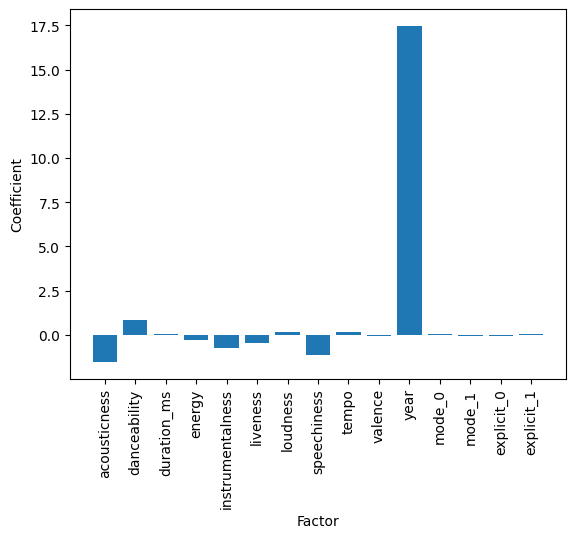

In [ ]:
# Get the coefficients of each factor
coefs=lr.coef_
# Plot the coefficients
x_strings = ['acousticness', 'danceability', 'duration_ms', 'energy',
       'instrumentalness', 'liveness', 'loudness',
       'speechiness', 'tempo', 'valence', 'year', 'mode_0', 'mode_1',
       'explicit_0', 'explicit_1']
plt.bar(x_strings, coefs)
plt.xticks(rotation=90)
plt.xlabel('Factor')
plt.ylabel('Coefficient')
plt.show()

#越新的歌越受欢迎

## 5. Modelling: Decision Tree

### 5.1 Classifier

In [ ]:
#set 55 as threshold
#add a column called "p/np"

# check if the "popularity" column is greater than 55 and create a new column called "p/np"
df_final["p/np"] = ["PO" if x > 55 else "NP" for x in df_final["popularity"]]
df_final=df_final.drop(columns='year')
y_tree = df_final['p/np']
X_tree = df_final.drop(['popularity','p/np'], axis=1)

tX_train, tX_test, ty_train, ty_test = train_test_split(X_tree, y_tree, test_size=0.20, random_state=0)

scaler = StandardScaler()

# Fit and transform scalar on X_train
tX_train.columns=tX_train.columns.astype(str)
tX_train = scaler.fit_transform(tX_train)

# Transform X_val
tX_test.columns=tX_test.columns.astype(str)
tX_test = scaler.transform(tX_test)


In [ ]:
dt = DecisionTreeClassifier()

# Use grid search to find the optimal max depth value
max_depth_range = range(1, 11)
param_grid = {'max_depth': max_depth_range}
grid = GridSearchCV(dt, param_grid, cv=5, scoring='accuracy')
grid.fit(tX_train, ty_train)

# Print the best max depth value and corresponding accuracy score
print('Best max depth value: {}'.format(grid.best_params_['max_depth']))
print('Best accuracy score: {:.2f}'.format(grid.best_score_))

KeyboardInterrupt: ignored

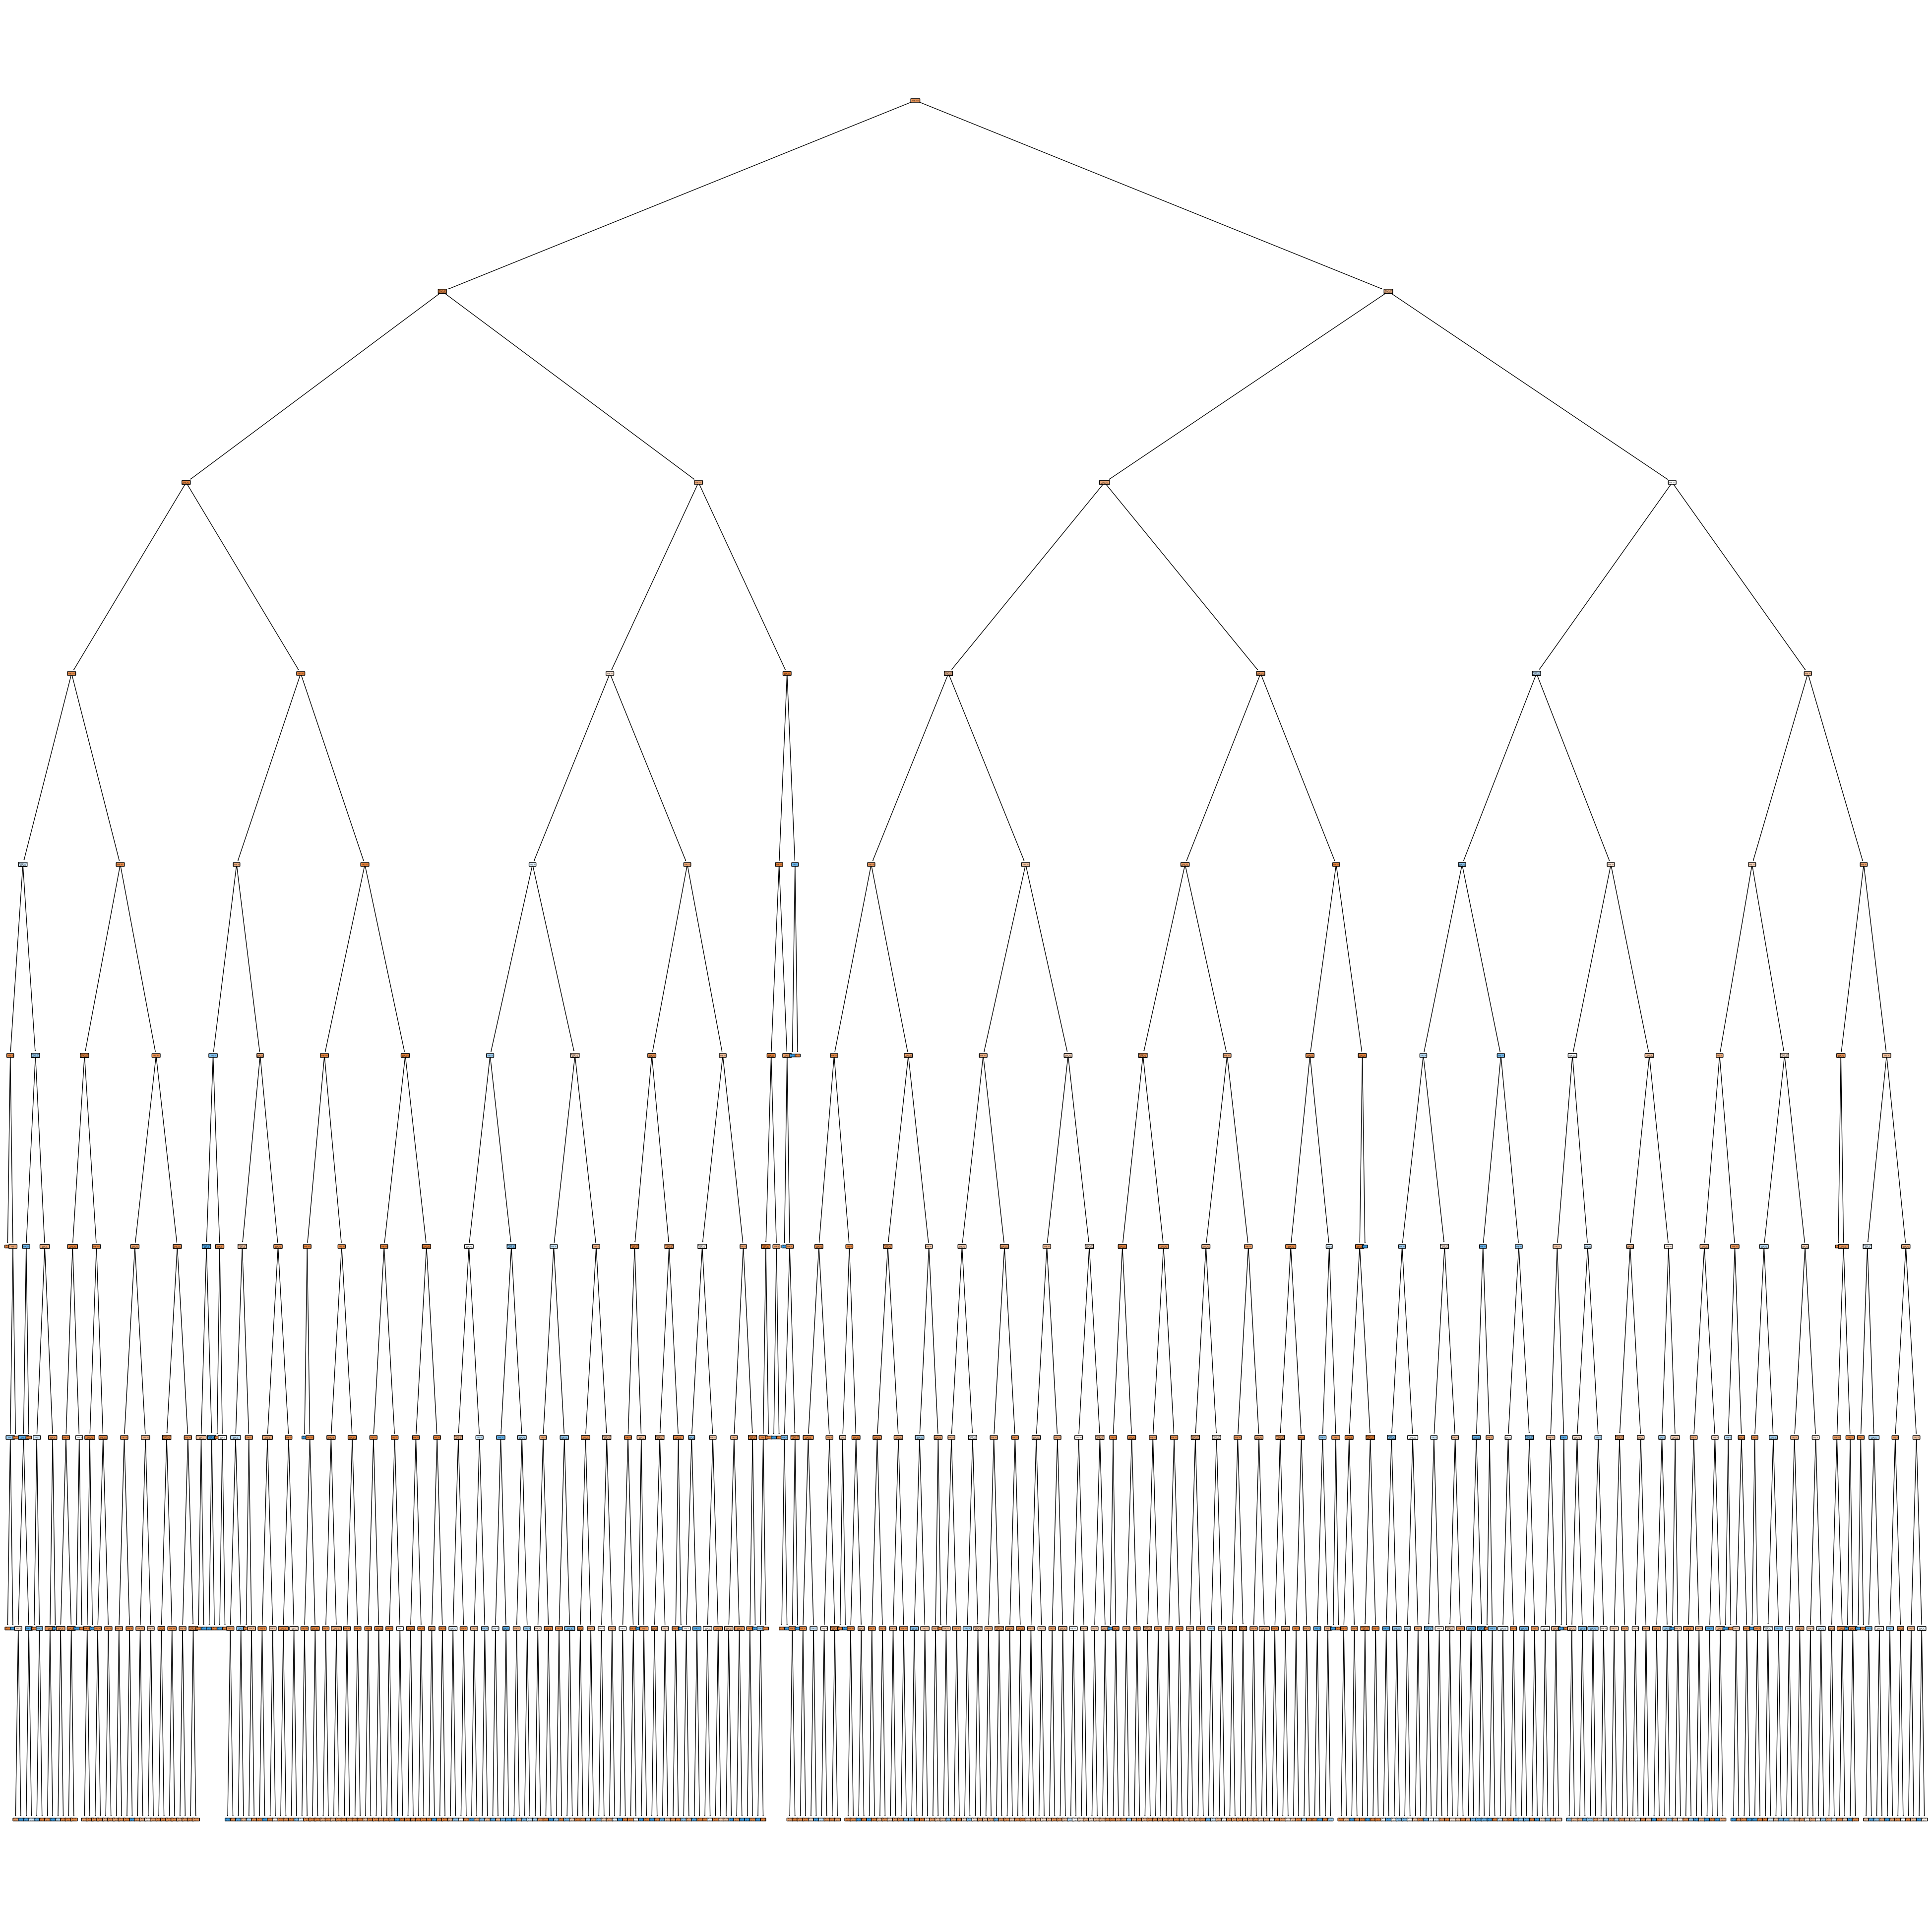

In [ ]:
#so set depth=9
tree_class = DecisionTreeClassifier(max_depth=9)
sc=cross_val_score(tree_class, tX_train, ty_train, cv=10)
tree_class.fit(tX_train, ty_train)
#plot
plt.figure(figsize=(50, 50))
features = X_tree.columns
plot_tree(tree_class, feature_names=features, class_names=["NP", "PO"], filled=True, rounded=True)
plt.show()

In [ ]:
#important features
importances = tree_class.feature_importances_
for feature, importance in zip(features, importances):
    print("{}: {}".format(feature, importance))

acousticness: 0.050513907275824936
danceability: 0.055649253186369305
duration_ms: 0.09322921215577844
energy: 0.06943155252559671
instrumentalness: 0.05418542905177525
liveness: 0.013720600665156363
loudness: 0.3910064832239011
speechiness: 0.05731473114106105
tempo: 0.013759953283455369
valence: 0.08168720644024179
mode_0: 0.0003372118407294994
mode_1: 0.0
explicit_0: 0.0
explicit_1: 0.11916445921011025


In [ ]:
sc.mean()

In [ ]:
tree_class.score(tX_test,ty_test)

### 5.2 Regressor

In [ ]:
tree_reg = DecisionTreeRegressor(max_depth=8)
sc_tr=cross_val_score(tree_reg, X_train, y_train, cv=10,scoring='neg_mean_squared_error')

# tree_reg.fit(X=X_train, y=y_train)

# tree_reg_pred = tree_reg.predict(X_test)

# #plot
# plt.figure(figsize=(20, 10))
# features = X_tree.columns
# plot_tree(tree_reg, feature_names=features, filled=True, rounded=True)
# plt.show()

In [ ]:
tree_reg.fit(X=X_train, y=y_train)

# tree_reg_pred = tree_reg.predict(X_test)

# #plot
plt.figure(figsize=(20, 20))
features = X_tree.columns
plot_tree(tree_reg, feature_names=features, filled=True, rounded=True)
plt.show()

In [ ]:
X

In [ ]:
tree_reg.fit(X=X_train, y=y_train)
importances = tree_reg.feature_importances_
for feature, importance in zip(features, importances):
    print("{}: {}".format(feature, importance))

In [ ]:
tree_reg.fit

In [ ]:
sc_tr=-sc_tr
sc_tr.mean()

In [ ]:
tree_reg1 = DecisionTreeClassifier(random_state=42)
params = {
    'max_depth': [2, 3, 5, 10, 20],
    'min_samples_leaf': [5, 10, 20, 50, 100],
    'criterion': ["gini", "entropy"]
}
grid_search = GridSearchCV(estimator=tree_reg1,param_grid=params,cv=4, n_jobs=-1, verbose=1, scoring = "accuracy")

grid_search.fit(tX_train, ty_train)

In [ ]:
score_df = pd.DataFrame(grid_search.cv_results_)


In [ ]:
score_df.nlargest(5,"mean_test_score")


In [ ]:
grid_search.best_estimator_


In [ ]:
tree_reg1_best = grid_search.best_estimator_

In [ ]:
def evaluate_model(tree_reg1_classifier):
    print("Train Accuracy :", accuracy_score(ty_train, tree_reg1_classifier.predict(tX_train)))
    print("Train Confusion Matrix:")
    print(confusion_matrix(ty_train, tree_reg1_classifier.predict(tX_train)))
    print("-"*50)
    print("Test Accuracy :", accuracy_score(y_test, tree_reg1_classifier.predict(X_test)))
    print("Test Confusion Matrix:")
    print(confusion_matrix(ty_test, tree_reg1_classifier.predict(tX_test)))
evaluate_model(tree_reg1_best)

In [ ]:
print(classification_report(ty_test, tree_reg1_best.predict(tX_test)))

In [ ]:
reg_trees=DecisionTreeClassifier(max_depth=3, random_state=42)
reg_trees.fit(tX_train, ty_train)
reg_trees.score(tX_train, ty_train)

In [ ]:
reg_trees.score(tX_test, ty_test)

In [ ]:
for max_d in range(1,10):
  model = DecisionTreeClassifier(max_depth=max_d, random_state=42)
  model.fit(tX_train, ty_train)
  print('The Training Accuracy for max_depth {} is:'.format(max_d), model.score(tX_train, ty_train))
  print('The Validation Accuracy for max_depth {} is:'.format(max_d), model.score(tX_test, ty_test))
  print('')

## 6. Modelling: Random Forest

### 6.1 Classifier

In [ ]:
rf_c = RandomForestClassifier(max_depth=9,max_features=0.6,max_samples=0.3,n_estimators=170,random_state=42)
# parameters = {'n_estimators':np.arange(50,200,15),
#               'max_features':np.arange(0.1, 1, 0.1),
#               'max_depth': [3, 5, 7, 9],
#               'max_samples': [0.3, 0.5, 0.8]}

# rf_c = RSCV(RandomForestClassifier(), parameters, n_iter = 15).fit(tX_train, ty_train)
# rf_c = rf_c.best_estimator_

#y_rfc_pred = model.predict(tX_test)
rf_c.fit(tX_train, ty_train)

RandomForestClassifier(max_depth=9, max_features=0.6, max_samples=0.3,
                       n_estimators=170, random_state=42)

In [ ]:
rf_c


RandomForestClassifier(max_depth=9, max_features=0.6, max_samples=0.3,
                       n_estimators=170, random_state=42)

In [ ]:
X_tree.columns

Index([    'acousticness',     'danceability',      'duration_ms',
                 'energy', 'instrumentalness',         'liveness',
               'loudness',      'speechiness',            'tempo',
                'valence',                  0,           'mode_0',
                 'mode_1',       'explicit_0',       'explicit_1'],
      dtype='object')

In [ ]:
importances = rf_c.feature_importances_
for feature, importance in zip(list(X_tree.columns), importances):
    print("{}: {}".format(feature, importance))


acousticness: 0.10228705349813934
danceability: 0.06043195379580909
duration_ms: 0.07881089810549999
energy: 0.0886990152865896
instrumentalness: 0.0692404852550214
liveness: 0.025716507564367094
loudness: 0.2908985174114457
speechiness: 0.03903926172114891
tempo: 0.022748061091851565
valence: 0.06783958544875394
0: 0.006052639956904237
mode_0: 0.0018246591467902331
mode_1: 0.0018495508209127745
explicit_0: 0.07251572347512701
explicit_1: 0.0720460874216393


In [ ]:
# Random forest accuracy
rf_c.score(tX_test,ty_test)

0.8751397798834677

### 6.2 Regressor

In [ ]:
from sklearn.model_selection import RandomizedSearchCV as RSCV

# rf_reg = RandomForestRegressor(random_state=42)
# rf_reg.fit(X_train, y_train)
parameters = {'n_estimators':np.arange(50,200,15),
              'max_features':np.arange(0.1, 1, 0.1),
              'max_depth': [3, 5, 7, 9],
              'max_samples': [0.3, 0.5, 0.8]}

model_reg = RSCV(RandomForestRegressor(), parameters, n_iter = 15).fit(X_train, y_train)
model_reg = model_reg.best_estimator_
# y_rfr_pred = rf_reg.predict(X_test)

In [ ]:
rf_reg=model_reg#(max_depth=7, max_features=0.8, max_samples=0.3,n_estimators=50)
rf_reg

RandomForestRegressor(max_depth=7, max_features=0.8, max_samples=0.3,
                      n_estimators=50)

In [ ]:
X_tree.columns

Index([    'acousticness',     'danceability',      'duration_ms',
                 'energy', 'instrumentalness',         'liveness',
               'loudness',      'speechiness',            'tempo',
                'valence',                  0,           'mode_0',
                 'mode_1',       'explicit_0',       'explicit_1'],
      dtype='object')

In [ ]:
importances = rf_reg.feature_importances_
for feature, importance in zip(list(X_tree.columns), importances):
    print("{}: {}".format(feature, importance))


acousticness: 0.08428922726506977
danceability: 0.0010610447045883284
duration_ms: 0.0032700878669652406
energy: 0.006683973245086081
instrumentalness: 0.0014210548738033053
liveness: 0.001245780040477145
loudness: 0.008514787209200358
speechiness: 0.003562735443443504
tempo: 0.0004302872372741663
valence: 0.0005391679910090687
0: 0.8866071436348881
mode_0: 0.00010391974344007226
mode_1: 1.1787163317825361e-05
explicit_0: 2.4631353756549043e-05
explicit_1: 0.0013695631609387563


In [ ]:
#R2
rf_reg.score(X_test,y_test)

0.8253262975765551

In [ ]:
#random forest regressor mse
y_rfr_pred = rf_reg.predict(X_test)
mean_squared_error(y_test,y_rfr_pred)

82.00924521381229

## 7.Modelling: SVM

In [ ]:
from sklearn.svm import LinearSVR
svr = LinearSVR()

# Define the parameter grid for hyperparameter tuning
param_grid = {'C': [0.1, 1, 10, 100]}

# Create a GridSearchCV object
grid = GridSearchCV(svr, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

# Train the model using the training sets
grid.fit(X_train, y_train)
print(grid.best_params_)
# Predict the target values of test data
svr_mse = -grid.score(X_test,y_test)
svr_mse

{'C': 1}


103.90110705224554

In [ ]:
#so set C=0.1
lsvr = LinearSVR(C=0.1)
lsvr.fit(X_train, y_train)

LinearSVR(C=0.1)

In [ ]:
pip install --upgrade sklearn.svm

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
ERROR: Could not find a version that satisfies the requirement sklearn.svm (from versions: none)
ERROR: No matching distribution found for sklearn.svm


In [ ]:
importance_svr = lsvr.coef_

In [ ]:
x_strings = ['acousticness', 'danceability', 'duration_ms', 'energy',
       'instrumentalness', 'liveness', 'loudness',
       'speechiness', 'tempo', 'valence', 'year', 'mode_0', 'mode_1',
       'explicit_0', 'explicit_1']

In [ ]:
for feature, importance in zip(x_strings, importance_svr):
    print("{}: {}".format(feature, importance))

acousticness: -1.2945572222958195
danceability: 1.0775196818034136
duration_ms: 0.056826687553230566
energy: -0.4192223329046461
instrumentalness: -0.5637348652115035
liveness: -0.3375219369695632
loudness: 0.22461017609192097
speechiness: -0.8870343340740054
tempo: 0.2060539273778213
valence: -0.18053652552965213
year: 17.916642097083205
mode_0: 0.12115338379752683
mode_1: -0.12115338379752683
explicit_0: -0.10570507993125697
explicit_1: 0.1057050799312301


In [ ]:
from sklearn.feature_selection import RFE
rfe = RFE(svr, n_features_to_select=3)
rfe.fit(X_train, y_train)

# Print the selected features
print("Selected Features: ")
print(X.columns[rfe.support_])

Selected Features: 
Index(['acousticness', 'danceability', 'year'], dtype='object')


In [ ]:
grid.best_estimator_.coef_

array([-1.28690246,  1.0896883 ,  0.07374776, -0.40941584, -0.58997839,
       -0.34386718,  0.19979053, -0.89219877,  0.19674219, -0.19322019,
       17.95081656,  0.13112292, -0.13112292, -0.15180356,  0.15180356])

In [ ]:
from sklearn.svm import LinearSVC
svc = LinearSVC(max_iter=1500,dual=False)
param_grid = {'C': [0.1, 1, 10,100]}

# Create a GridSearchCV object
grid = GridSearchCV(svc, param_grid, cv=5,scoring='accuracy', n_jobs=-1)

# Train the model using the training sets
grid.fit(X_train, y_train)
print(grid.best_params_)
# Predict the target values of test data
svc_accuracy = grid.score(tX_test,ty_test)
svc_accuracy

/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


In [ ]:
#so set C=0.1
from sklearn.svm import LinearSVC
lsvc = LinearSVC(C=0.1)
lsvc.fit(X_train, y_train)

In [ ]:
importance_svc = lsvc.coef_

In [ ]:
for feature, importance in zip(x_strings, importance_svc):
    print("{}: {}".format(feature, importance))

In [ ]:
x_strings = ['acousticness', 'danceability', 'duration_ms', 'energy',
       'instrumentalness', 'liveness', 'loudness',
       'speechiness', 'tempo', 'valence', 'year', 'mode_0', 'mode_1',
       'explicit_0', 'explicit_1']

In [ ]:
grid.best_estimator_.coef_

array([[-0.08947149,  0.14101874, -0.05591967, -0.02467932, -0.01652234,
        -0.03588347,  0.18785643, -0.08327815,  0.02358553, -0.17395067,
         0.00735492, -0.00735492, -0.05969634,  0.05969634]])

##Bagging

In [ ]:
bag_clf = BaggingClassifier(DecisionTreeClassifier(), n_estimators=500, max_samples=0.63, bootstrap=True, n_jobs=-1, oob_score=True)
bag_clf.fit(X_train, y_train)
bag_clf.oob_score_

TerminatedWorkerError: ignored

In [ ]:
y_hat = bag_clf.predict(X_val)
accuracy_score(y_val, y_hat)

## 8. Boosting

In [ ]:
#set 55 as threshold
#add a column called "p/np"

# check if the "popularity" column is greater than 55 and create a new column called "p/np"
df_final["p/np"] = ["PO" if x > 55 else "NP" for x in df_final["popularity"]]
y_boost = df_final['p/np']
X_boost = df_final.drop(['popularity','p/np'], axis=1)

bX_train, bX_test, by_train, by_test = train_test_split(X_boost, y_boost, test_size=0.20, random_state=0)

scaler = StandardScaler()

# Fit and transform scalar on X_train
bX_train.columns=bX_train.columns.astype(str)
bX_train = scaler.fit_transform(bX_train)

# Transform X_val
bX_test.columns=bX_test.columns.astype(str)
bX_test = scaler.transform(bX_test)

### 8.1 Adaboost Classifier

In [ ]:
# Grid Search
params = {'n_estimators':[10,50,100],'learning_rate':[0.01,0.1,1]}
ada_gscv = GridSearchCV(estimator=AdaBoostClassifier(random_state=123), param_grid=params, cv=3, refit=True, n_jobs=-1)
ada_gscv.fit(bX_train, by_train)
print(f'ada best hyperparams      : {ada_gscv.best_params_}')
print(f'ada best mean cv accuracy : {ada_gscv.best_score_:.2f}')

ada best hyperparams      : {'learning_rate': 1, 'n_estimators': 100}
ada best mean cv accuracy : 0.87


In [ ]:
ada_best = AdaBoostClassifier(n_estimators=10, learning_rate=0.01,random_state=123)
ada_best.fit(bX_train, by_train)
print(f"The train score is:",ada_best.score(bX_train, by_train))

The train score is: 0.8568422756332443


In [ ]:
x_strings = ['acousticness', 'danceability', 'duration_ms', 'energy',
       'instrumentalness', 'liveness', 'loudness',
       'speechiness', 'tempo', 'valence', 'year', 'mode_0', 'mode_1',
       'explicit_0', 'explicit_1']

In [ ]:
importances = ada_best.feature_importances_
features_dict = dict(zip(x_strings, abs(importances)))
important_features = sorted(features_dict.items(), key=lambda x: -x[1])
important_features

[('loudness', 1.0),
 ('acousticness', 0.0),
 ('danceability', 0.0),
 ('duration_ms', 0.0),
 ('energy', 0.0),
 ('instrumentalness', 0.0),
 ('liveness', 0.0),
 ('speechiness', 0.0),
 ('tempo', 0.0),
 ('valence', 0.0),
 ('year', 0.0),
 ('mode_0', 0.0),
 ('mode_1', 0.0),
 ('explicit_0', 0.0)]

In [ ]:
sns.barplot(x=x_strings, y=abs(importances))
plt.xticks(rotation=90)
plt.title("Feature Importance of Adaboost")
plt.xlabel("Feature names")
plt.ylabel("Feature importance")
plt.show()

KeyError: ignored

In [ ]:
# dropping year
# Grid Search
params = {'n_estimators':[10,50,100],'learning_rate':[0.01,0.1,1]}
ada_gscv = GridSearchCV(estimator=AdaBoostClassifier(random_state=123), param_grid=params, cv=3, refit=True, n_jobs=-1)
ada_gscv.fit(tX_train, ty_train)
print(f'ada best hyperparams      : {ada_gscv.best_params_}')
print(f'ada best mean cv accuracy : {ada_gscv.best_score_:.2f}')

ada best hyperparams      : {'learning_rate': 1, 'n_estimators': 100}
ada best mean cv accuracy : 0.87


In [ ]:
ada_best = AdaBoostClassifier(n_estimators=100, learning_rate=1,random_state=123)
ada_best.fit(tX_train, ty_train)
print(f"The train score is:",ada_best.score(tX_train, ty_train))

The train score is: 0.8665092292186247


In [ ]:
#ada classification--best--no year
ada_best.score(tX_test,ty_test)

0.8655170384321111

In [ ]:
x_strings_new = ['acousticness', 'danceability', 'duration_ms', 'energy',
       'instrumentalness', 'liveness', 'loudness',
       'speechiness', 'tempo', 'valence', 'mode_0', 'mode_1',
       'explicit_0', 'explicit_1']

In [ ]:
importances = ada_best.feature_importances_
features_dict = dict(zip(x_strings_new, abs(importances)))
important_features = sorted(features_dict.items(), key=lambda x: -x[1])
important_features

[('loudness', 0.19),
 ('valence', 0.16),
 ('danceability', 0.12),
 ('acousticness', 0.1),
 ('energy', 0.08),
 ('instrumentalness', 0.08),
 ('speechiness', 0.08),
 ('duration_ms', 0.07),
 ('tempo', 0.05),
 ('liveness', 0.04),
 ('explicit_0', 0.02),
 ('mode_1', 0.01),
 ('mode_0', 0.0),
 ('explicit_1', 0.0)]

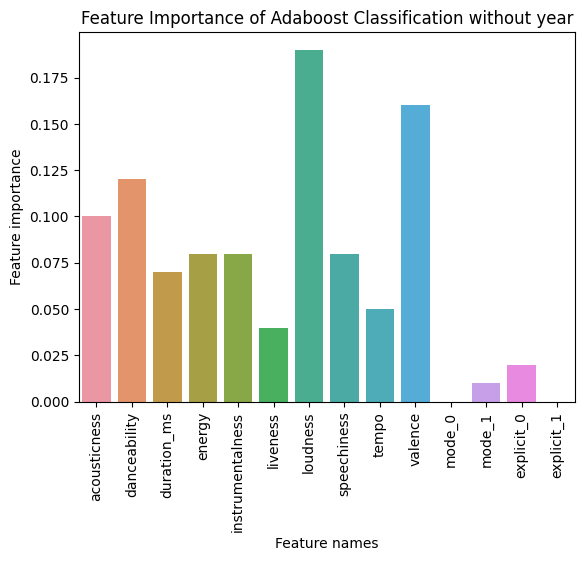

In [ ]:
sns.barplot(x=x_strings_new, y=abs(importances))
plt.xticks(rotation=90)
plt.title("Feature Importance of Adaboost Classification without year")
plt.xlabel("Feature names")
plt.ylabel("Feature importance")
plt.show()

### 8.2 Adaboost Regressor

In [ ]:
# Grid Search
params = {'n_estimators':[10,50,100],'learning_rate':[0.01,0.1,1]}
ada_gscv = GridSearchCV(estimator=AdaBoostRegressor(random_state=123), param_grid=params, cv=3, refit=True, n_jobs=-1)
ada_gscv.fit(X_train, y_train)
print(f'ada best hyperparams      : {ada_gscv.best_params_}')
print(f'ada best mean cv accuracy : {ada_gscv.best_score_:.2f}')

ada best hyperparams      : {'learning_rate': 0.01, 'n_estimators': 100}
ada best mean cv accuracy : 0.81


In [ ]:
ada_best = AdaBoostRegressor(n_estimators=100, learning_rate=0.01,random_state=123)
ada_best.fit(X_train, y_train)
print(f"The train score is:",ada_best.score(X_train, y_train))

The train score is: 0.8092775325991486


In [ ]:
y_ada_pred = ada_best.predict(X_test)
ada_mse=mean_squared_error(y_test,y_ada_pred)
ada_mse

88.50750095326667

In [ ]:
importances = ada_best.feature_importances_
features_dict = dict(zip(x_strings, importances))
important_features = sorted(features_dict.items(), key=lambda x: -x[1])
important_features

[('year', 0.999911475733514),
 ('instrumentalness', 8.852426648599048e-05),
 ('acousticness', 0.0),
 ('danceability', 0.0),
 ('duration_ms', 0.0),
 ('energy', 0.0),
 ('liveness', 0.0),
 ('loudness', 0.0),
 ('speechiness', 0.0),
 ('tempo', 0.0),
 ('valence', 0.0),
 ('mode_0', 0.0),
 ('mode_1', 0.0),
 ('explicit_0', 0.0),
 ('explicit_1', 0.0)]

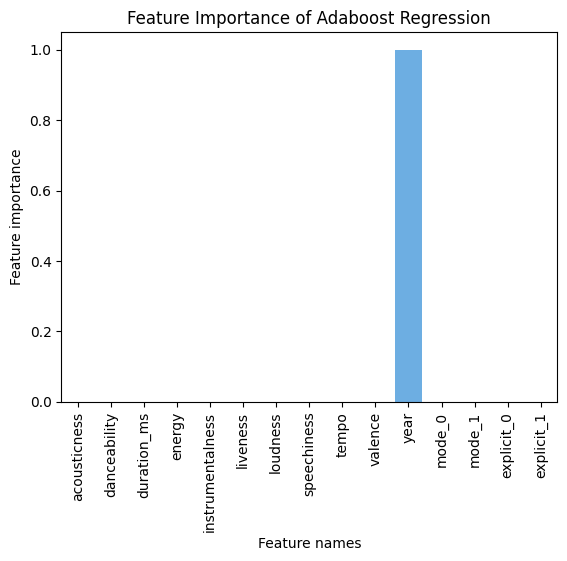

In [ ]:
sns.barplot(x=x_strings, y=abs(importances))
plt.xticks(rotation=90)
plt.title("Feature Importance of Adaboost Regression")
plt.xlabel("Feature names")
plt.ylabel("Feature importance")
plt.show()

### 8.3 Gradient Boost Classifor

In [ ]:
# without year
# Grid Search
params = {'n_estimators':[10,50,100],'learning_rate':[0.01,0.1,1]}
gr_gscv = GridSearchCV(estimator=GradientBoostingClassifier(random_state=123), param_grid=params, cv=3, refit=True, n_jobs=-1)
gr_gscv.fit(tX_train, ty_train)
print(f'gr best hyperparams      : {gr_gscv.best_params_}')
print(f'gr best mean cv accuracy : {gr_gscv.best_score_:.2f}')

gr best hyperparams      : {'learning_rate': 0.1, 'n_estimators': 100}
gr best mean cv accuracy : 0.87


In [ ]:
gr_best = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1,random_state=123)
gr_best.fit(tX_train, ty_train)
print(f"The train score is:",gr_best.score(tX_train, ty_train))

The train score is: 0.8745282394226312


In [ ]:
#gr classification--best
gr_best.score(tX_test,ty_test)

0.8726973103407687

In [ ]:
importances = gr_best.feature_importances_
features_dict = dict(zip(x_strings_new, importances))
important_features = sorted(features_dict.items(), key=lambda x: -x[1])
important_features

[('loudness', 0.446504276494264),
 ('valence', 0.09934049768951345),
 ('explicit_1', 0.08247547794542277),
 ('danceability', 0.06878142305033512),
 ('instrumentalness', 0.06121683273571657),
 ('acousticness', 0.06098251488399237),
 ('duration_ms', 0.05479575537745372),
 ('speechiness', 0.04333779409716876),
 ('energy', 0.04048006021648193),
 ('explicit_0', 0.023480511371999507),
 ('liveness', 0.013094112097249758),
 ('tempo', 0.005122096522982719),
 ('mode_0', 0.0002804404966385491),
 ('mode_1', 0.00010820702078085045)]

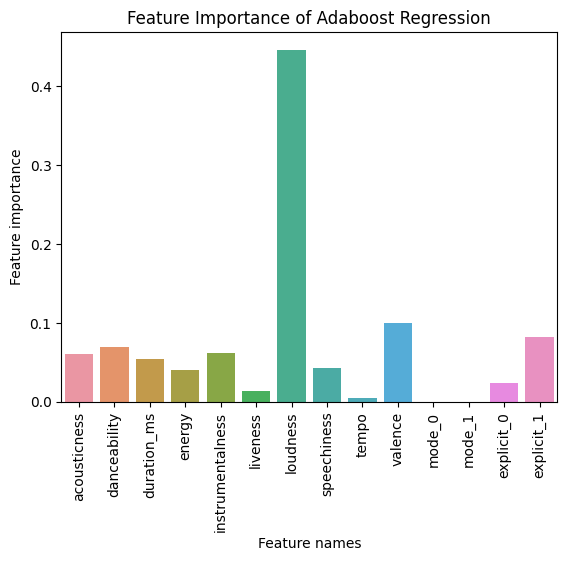

In [ ]:
sns.barplot(x=x_strings_new, y=abs(importances))
plt.xticks(rotation=90)
plt.title("Feature Importance of Adaboost Regression")
plt.xlabel("Feature names")
plt.ylabel("Feature importance")
plt.show()

### 8.4 Gradient Boost Regressor

In [ ]:
# Grid Search
params = {'n_estimators':[10,50,100],'learning_rate':[0.01,0.1,1]}
gr_gscv = GridSearchCV(estimator=GradientBoostingRegressor(random_state=123), param_grid=params, cv=3, refit=True, n_jobs=-1)
gr_gscv.fit(X_train, y_train)
print(f'gr best hyperparams      : {gr_gscv.best_params_}')
print(f'gr best mean cv accuracy : {gr_gscv.best_score_:.2f}')

gr best hyperparams      : {'learning_rate': 0.1, 'n_estimators': 100}
gr best mean cv accuracy : 0.82


In [ ]:
gr_best = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1,random_state=123)
gr_best.fit(X_train, y_train)
print(f"The train score is:",gr_best.score(X_train, y_train))

The train score is: 0.8254042392869094


In [ ]:
y_gr_pred = ada_best.predict(X_test)
gr_mse=mean_squared_error(y_test,y_gr_pred)
gr_mse

88.50750095326667

In [ ]:
importances = gr_best.feature_importances_
features_dict = dict(zip(x_strings, importances))
important_features = sorted(features_dict.items(), key=lambda x: -x[1])
important_features

[('year', 0.9891290250186039),
 ('duration_ms', 0.001983907069081938),
 ('loudness', 0.0018745940843747676),
 ('acousticness', 0.0013931947691998496),
 ('instrumentalness', 0.0013718304785855248),
 ('speechiness', 0.0012971578025173917),
 ('liveness', 0.0011978459273449314),
 ('danceability', 0.0010141338359043433),
 ('energy', 0.0004281651086814007),
 ('explicit_1', 0.00010188195441835634),
 ('valence', 7.239236318631966e-05),
 ('explicit_0', 4.9889088651247526e-05),
 ('tempo', 4.977244604196847e-05),
 ('mode_0', 2.2183807538233905e-05),
 ('mode_1', 1.4026245869601496e-05)]

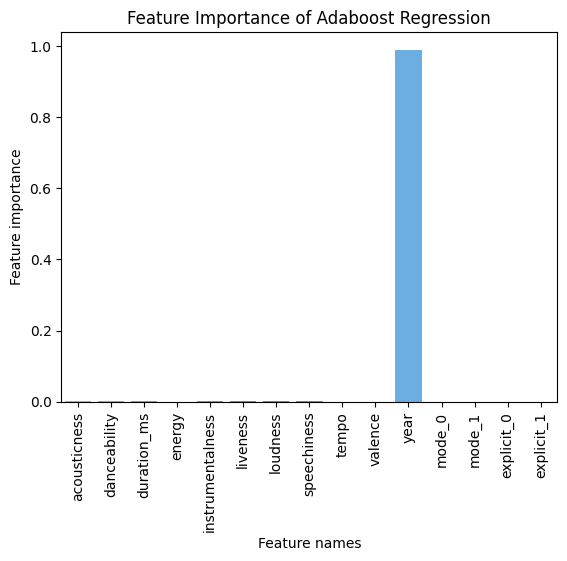

In [ ]:
sns.barplot(x=x_strings, y=abs(importances))
plt.xticks(rotation=90)
plt.title("Feature Importance of Adaboost Regression")
plt.xlabel("Feature names")
plt.ylabel("Feature importance")
plt.show()

### 8.5 Xgboost


In [ ]:
# Impute missing values
imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

# Fit the model
xgb = XGBRegressor(max_depth=3, learning_rate=0.1, n_estimators=100)
xgb.fit(X_train_imputed, y_train)

# Make predictions on the test set
y_pred = xgb.predict(X_test_imputed)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)

print(mse)

81.72502065764989


In [ ]:
xgb.fit(X_train_imputed, y_train, eval_set=[(X_test_imputed, y_test)], early_stopping_rounds=2)

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[0]	validation_0-rmse:34.32786
[1]	validation_0-rmse:31.17551
[2]	validation_0-rmse:28.36521
[3]	validation_0-rmse:25.86071
[4]	validation_0-rmse:23.63533
[5]	validation_0-rmse:21.66505
[6]	validation_0-rmse:19.92594
[7]	validation_0-rmse:18.38949
[8]	validation_0-rmse:17.04233
[9]	validation_0-rmse:15.86846
[10]	validation_0-rmse:14.84613
[11]	validation_0-rmse:13.96290
[12]	validation_0-rmse:13.20264
[13]	validation_0-rmse:12.55205
[14]	validation_0-rmse:11.99765
[15]	validation_0-rmse:11.52734
[16]	validation_0-rmse:11.13050
[17]	validation_0-rmse:10.79648
[18]	validation_0-rmse:10.51678
[19]	validation_0-rmse:10.28202
[20]	validation_0-rmse:10.08684
[21]	validation_0-rmse:9.92481
[22]	validation_0-rmse:9.79080
[23]	validation_0-rmse:9.67868
[24]	validation_0-rmse:9.58615
[25]	validation_0-rmse:9.50909
[26]	validation_0-rmse:9.44411
[27]	validation_0-rmse:9.38941
[28]	validation_0-rmse:9.34559
[29]	validation_0-rmse:9.30690
[30]	validation_0-rmse:9.27705
[31]	validation_0-rmse:9.251

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [ ]:
importances = xgb.feature_importances_
features_dict = dict(zip(x_strings, importances))
important_features = sorted(features_dict.items(), key=lambda x: -x[1])
important_features

[('year', 0.93086195),
 ('loudness', 0.010514024),
 ('acousticness', 0.009820845),
 ('instrumentalness', 0.009517046),
 ('duration_ms', 0.009120449),
 ('liveness', 0.0070600067),
 ('danceability', 0.005774328),
 ('explicit_0', 0.0051405346),
 ('speechiness', 0.0047789575),
 ('energy', 0.0031560701),
 ('valence', 0.0016335753),
 ('mode_0', 0.0016307181),
 ('tempo', 0.000991506),
 ('mode_1', 0.0),
 ('explicit_1', 0.0)]

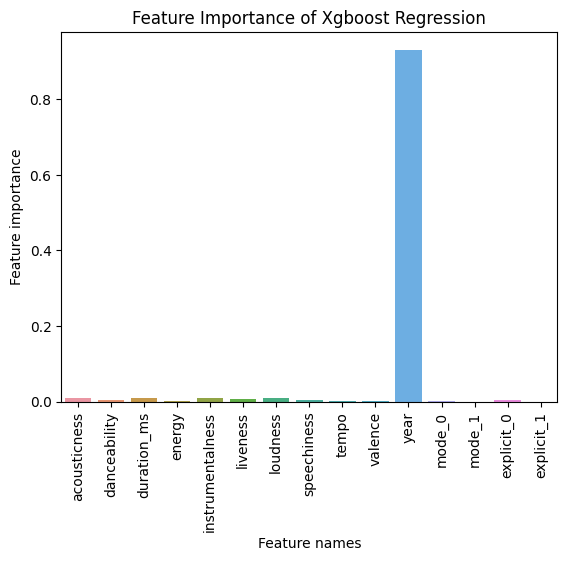

In [ ]:
sns.barplot(x=x_strings, y=abs(importances))
plt.xticks(rotation=90)
plt.title("Feature Importance of Xgboost Regression")
plt.xlabel("Feature names")
plt.ylabel("Feature importance")
plt.show()

## 8. Evaluate the model

### 8.1 Using RMSE to evaluate the performance of Regression

RMSE

In [ ]:
#Measure the performance of LinearRegression Model
lr_mse = mean_squared_error(y_test,yhat_rf)

lr_mse

ValueError: ignored

In [ ]:
#Evaluate the model using DecisionTreeRegressor
tree_reg_pred = tree_reg.predict(X_test)
tree_mse = mean_squared_error(y_test,tree_reg_pred)

tree_mse

82.70101384707216

In [ ]:
#random forest -- best
rf_mse=mean_squared_error(y_test,y_rfr_pred)
rf_mse

NameError: ignored

In [ ]:
# SVM
svr_mse

NameError: ignored

### 8.2 Accuracy evaluting performance of classification model







In [ ]:
#decision tree
tree_class.score(tX_test,ty_test)

0.8697251486080866

In [ ]:
tree_reg.score(X_test,y_test)

0.8238528809138743

In [ ]:
#Random forest--best
rf_c.score(tX_test,ty_test)

In [ ]:
#SVM
svc_accuracy

In [ ]:
# #We use Cross_Validation to evaluate the model
# from sklearn.model_selection import cross_val_score
# scores = cross_val_score(estimator=tree_reg, X=X_train, y=y_train, scoring='neg_mean_squared_error', cv=10)
# tree_rmse_scores = np.sqrt(-scores)
# def display_scores(scores):
#     """Displays the scores, their mean, and the standard deviation.

#     # Arguments:
#         scores, np.array: list of scores given by the cross validation procedure.
#     """
#     print("Scores:", scores)
#     print("Mean:", scores.mean())
#     print("Standard Deviation:", scores.std())

In [ ]:
nums=[3,1,2,4]
begin,end=0,len(nums)-1
while begin<end:
    if begin%2==0:
        begin+=1
    else:
        nums[begin],nums[end]=nums[end],nums[begin]
        end-=1


In [ ]:
nums

In [ ]:
int('1001',2)

In [ ]:
1234%10

In [ ]:
1234//10

In [ ]:
[1]*10

In [ ]:
"sadbutsad"[8:10]

In [ ]:
n=4
x=[1]*n
x[1]=2
for i in range(2,n):
    x[i]=x[i-1]+x[i-2]

print(x[n-1])

In [ ]:
'Aibnio'.lower()

In [ ]:
ord('A')

In [ ]:
chr(65)

## Clustering

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

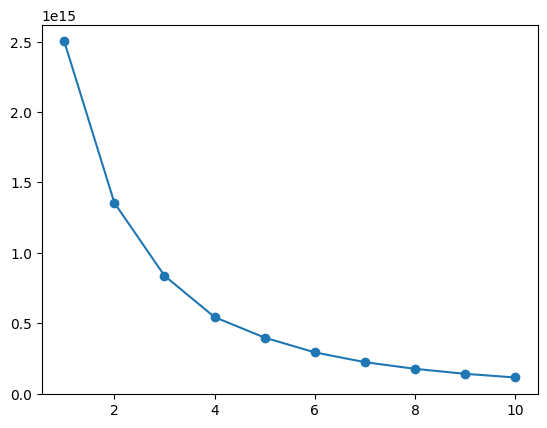

In [ ]:
# Drop useless columns
df_cluster = df.drop(['artists','name','release_date','id'], axis=1)

y = df_cluster['popularity']
X = df_cluster.drop(['popularity'], axis=1)

# find the best number of clusters
inertia = []
for i in range(1, 11):
    km = KMeans(n_clusters=i, random_state=0)
    km.fit(X)
    inertia.append(km.inertia_)

plt.plot(range(1, 11), inertia, marker='o')

In [ ]:
df_cluster = df.drop(['artists','name','release_date','id'], axis=1)

y = df_cluster['popularity']
X = df_cluster.drop(['popularity'], axis=1)

In [ ]:
kmeans = KMeans(n_clusters=4, random_state=0).fit(X)

X['cluster'] = kmeans.labels_

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
X

acousticness  danceability  duration_ms  energy  explicit  \
0             0.9950         0.708       158648  0.1950         0   
1             0.9940         0.379       282133  0.0135         0   
2             0.6040         0.749       104300  0.2200         0   
3             0.9950         0.781       180760  0.1300         0   
4             0.9900         0.210       687733  0.2040         0   
...              ...           ...          ...     ...       ...   
169904        0.1730         0.875       163800  0.4430         1   
169905        0.0167         0.719       167468  0.3850         0   
169906        0.5380         0.514       180700  0.5390         0   
169907        0.0714         0.646       167308  0.7610         0   
169908        0.1090         0.512       214787  0.4280         0   

        instrumentalness  key  liveness  loudness  mode  speechiness    tempo  \
0               0.563000   10    0.1510   -12.428     1       0.0506  118.469   
1               0.901000    8    0.0763   -28.454     1       0.0462   83.972   
2               0.000000    5    0.1190   -19.924     0       0.9290  107.177   
3               0.887000    1    0.1110   -14.734     0       0.0926  108.003   
4               0.908000   11    0.0980   -16.829     1       0.0424   62.149   
...                  ...  ...       ...       ...   ...          ...      ...   
169904          0.000032    1    0.0891    -7.461     1       0.1430  100.012   
169905          0.031300    8    0.1110   -10.907     1       0.0403  128.000   
169906          0.002330    7    0.1080    -9.332     1       0.1050  123.700   
169907          0.000000    1    0.2220    -2.557     1       0.0385  129.916   
169908          0.000000    0    0.1050    -7.387     1       0.0271   80.588   

        valence  year  cluster  
0        0.7790  1928        2  
1        0.0767  1928        0  
2        0.8800  1928        2  
3        0.7200  1928        2  
4        0.0693  1928        1  
...         ...   ...      ...  
169904   0.3060  2020        2  
169905   0.2700  2020        2  
169906   0.1530  2020        2  
169907   0.4720  2020        2  
169908   0.3660  2020        2  

[169909 rows x 15 columns]

In [ ]:
cl=pd.DataFrame(X.groupby('cluster').mean())

In [ ]:
silhouette_score(X, kmeans.labels_)

0.5534344751498448

In [ ]:
cl

acousticness  danceability   duration_ms    energy  explicit  \
cluster                                                                 
0            0.361428      0.542781  2.792041e+05  0.555768  0.099444   
1            0.556893      0.427892  5.198750e+05  0.417558  0.023929   
2            0.566147      0.546030  1.708483e+05  0.455100  0.081777   
3            0.736788      0.350738  1.365547e+06  0.308810  0.008865   

         instrumentalness       key  liveness   loudness      mode  \
cluster                                                              
0                0.129972  5.204168  0.203747 -10.385591  0.677183   
1                0.345756  5.148157  0.240370 -14.025472  0.652507   
2                0.163641  5.203572  0.205133 -11.705472  0.732551   
3                0.448182  5.078014  0.277517 -16.635665  0.693262   

         speechiness       tempo   valence         year  
cluster                                                  
0           0.081153  117.845023  0.491251  1986.561024  
1           0.087403  112.191172  0.371329  1970.032975  
2           0.101996  116.896174  0.572541  1972.291608  
3           0.176325  103.412475  0.239232  1959.574468

# word cloud per cluster

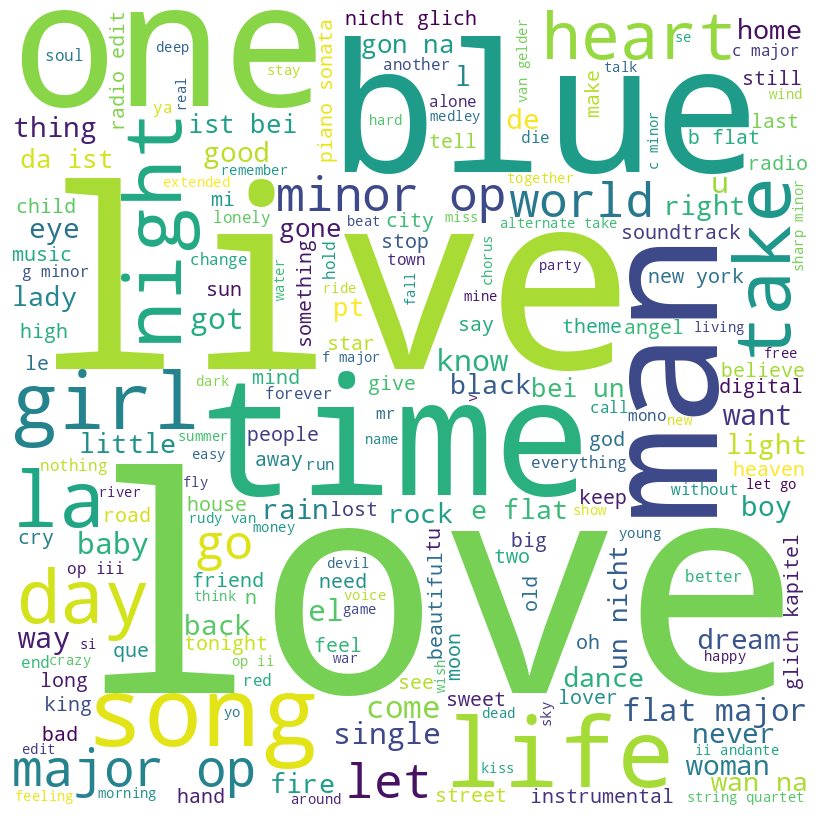

In [ ]:
X['name']=df.name
# cluster 0
song_names = X[X['cluster']==0]['name'].to_list()

# Concatenate the song names into a single string
song_text = ' '.join(song_names)

# Tokenize the text into words
words = word_tokenize(song_text)

# Generate the word cloud
wordcloud = WordCloud(width=800, height=800, background_color='white', min_font_size=10).generate(' '.join(words))
plt.figure(figsize=(8,8), facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()
wordcloud.to_file("name0_wdcloud.png")

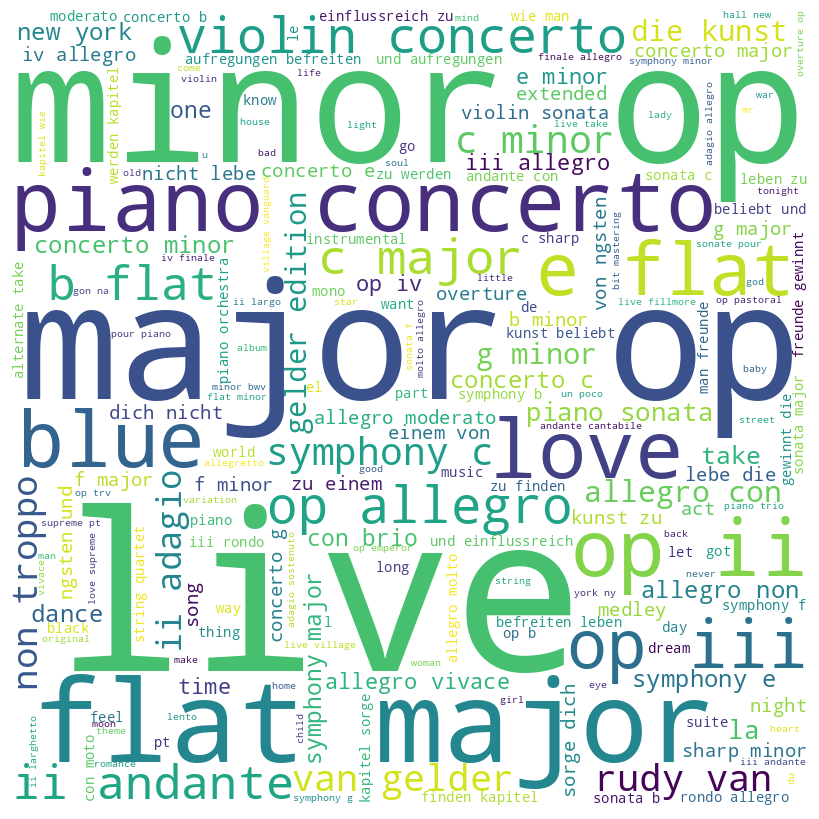

In [ ]:
# cluster 1
song_names = X[X['cluster']==1]['name'].to_list()

# Concatenate the song names into a single string
song_text = ' '.join(song_names)

# Tokenize the text into words
words = word_tokenize(song_text)

# Generate the word cloud
wordcloud = WordCloud(width=800, height=800, background_color='white', min_font_size=10).generate(' '.join(words))
plt.figure(figsize=(8,8), facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()
wordcloud.to_file("name1_wdcloud.png")

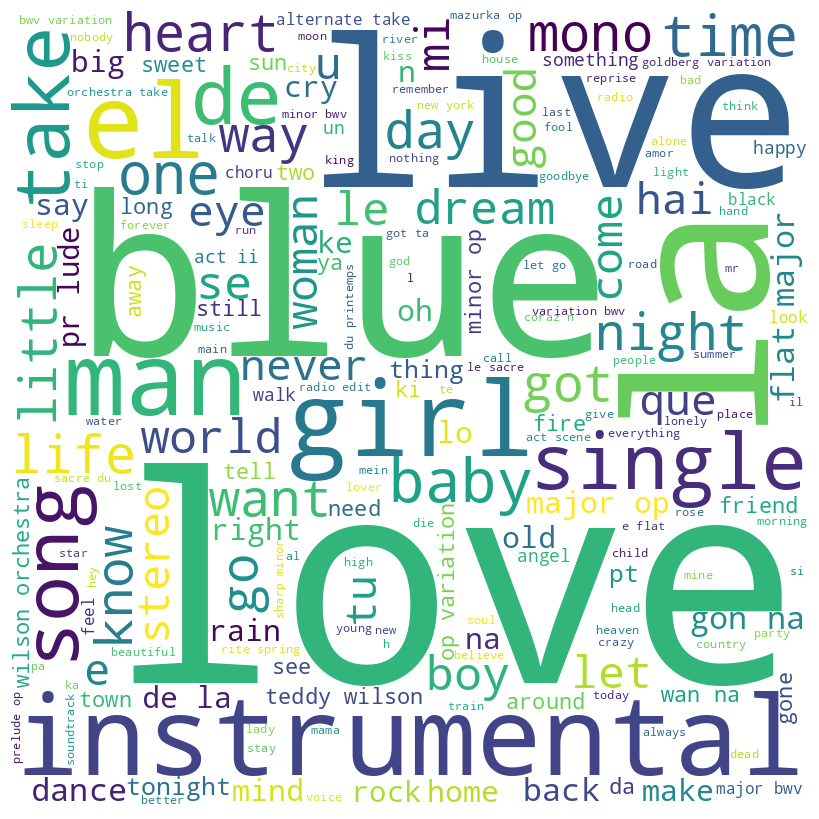

In [ ]:
# cluster 2
song_names = X[X['cluster']==2]['name'].to_list()

# Concatenate the song names into a single string
song_text = ' '.join(song_names)

# Tokenize the text into words
words = word_tokenize(song_text)

# Generate the word cloud
wordcloud = WordCloud(width=800, height=800, background_color='white', min_font_size=10).generate(' '.join(words))
plt.figure(figsize=(8,8), facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()
wordcloud.to_file("name2_wdcloud.png")

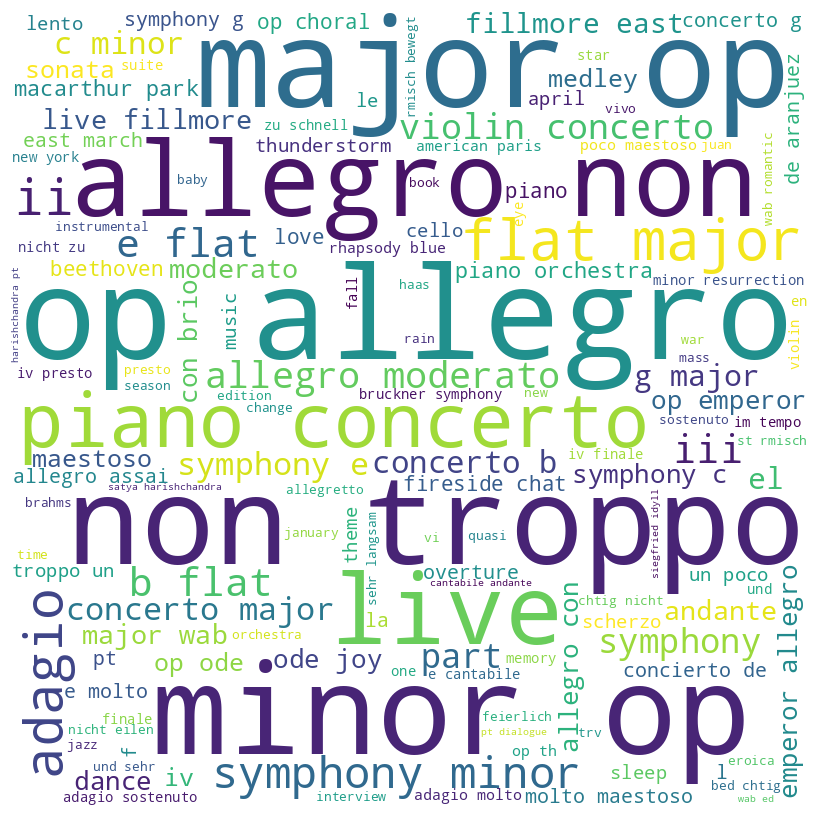

In [ ]:
# cluster 3
song_names = X[X['cluster']==3]['name'].to_list()

# Concatenate the song names into a single string
song_text = ' '.join(song_names)

# Tokenize the text into words
words = word_tokenize(song_text)

# Generate the word cloud
wordcloud = WordCloud(width=800, height=800, background_color='white', min_font_size=10).generate(' '.join(words))
plt.figure(figsize=(8,8), facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()
wordcloud.to_file("name3_wdcloud.png")

In [ ]:
import numpy as np
x=np.array([[797,461],
   [311,181],
   [570,480],
   [909,449]])

In [ ]:
m=np.array([[782.7,475.3],
   [306.11,185.89],
   [653.28,396.72],
   [844.91,513.09]])

In [ ]:
np.sum((x-m)**2/m)

41.8639860550171